In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
# Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Model Training with Hyperparameter Tuning
param_grid = {'max_depth': [2, 3, 5, 10], 'criterion': ['gini', 'entropy']}
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10]},
             scoring='accuracy')

In [ ]:
# Best Model
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

In [ ]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

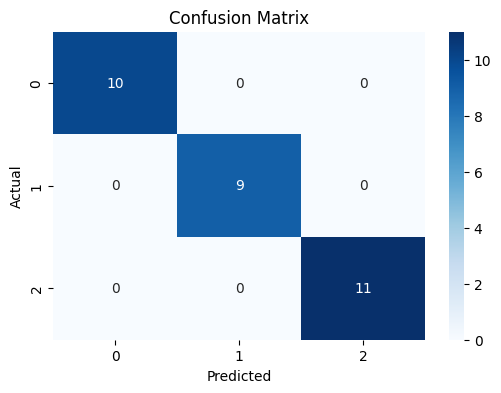

In [ ]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

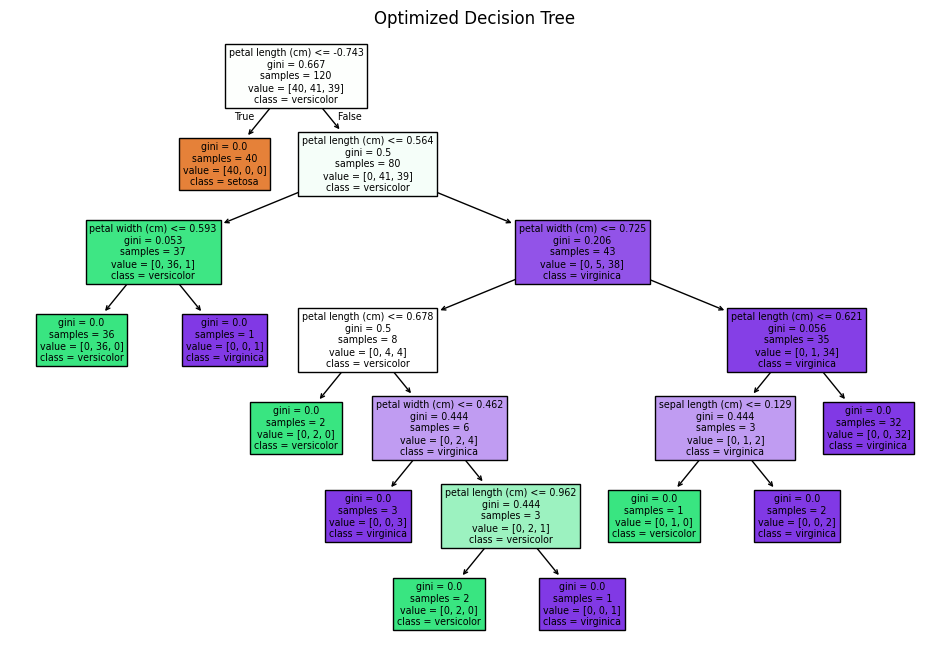

In [ ]:
# Decision Tree Visualization
plt.figure(figsize=(12, 8))
plot_tree(best_dt, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Optimized Decision Tree")
plt.show()


In [ ]:
# Comparison with Other Models
models = {'Decision Tree': best_dt, 'Random Forest': RandomForestClassifier(), 'SVM': SVC()}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
SVM Accuracy: 1.00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score

In [ ]:
# Load dataset
dataset_path = "/content/Social_Network_Ads.csv"
df = pd.read_csv(dataset_path)


In [31]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [ ]:
# Preprocessing
df.drop(columns=['User ID'], inplace=True)

In [ ]:
# Encoding categorical feature
column_transformer = ColumnTransformer([
    ('gender', OneHotEncoder(drop='first'), ['Gender'])
], remainder='passthrough')

In [ ]:
# Splitting features and target
X = df.drop(columns=['Purchased'])
y = df['Purchased']

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = column_transformer.fit_transform(X)
X_scaled = scaler.fit_transform(X_scaled)


In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Decision Tree with Hyperparameter Tuning
param_grid = {'max_depth': [2, 3, 5, 10], 'criterion': ['gini', 'entropy']}
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10]},
             scoring='accuracy')

In [ ]:
# Best Decision Tree Model
best_dt = grid_search.best_estimator_
y_pred_dt = best_dt.predict(X_test)


In [ ]:
# KNN Classification
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
# Clustering with K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")


K-Means Silhouette Score: 0.37


In [ ]:

# Anomaly Detection with Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
anomaly_labels = iso_forest.fit_predict(X_scaled)
anomaly_counts = pd.Series(anomaly_labels).value_counts()
print("Anomaly Detection Counts:", anomaly_counts)


Anomaly Detection Counts:  1    380
-1     20
Name: count, dtype: int64


In [ ]:
# Evaluation Metrics
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"{name} Classification Report:\n", classification_report(y_true, y_pred))
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

Decision Tree Accuracy: 0.91
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       0.84      0.93      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



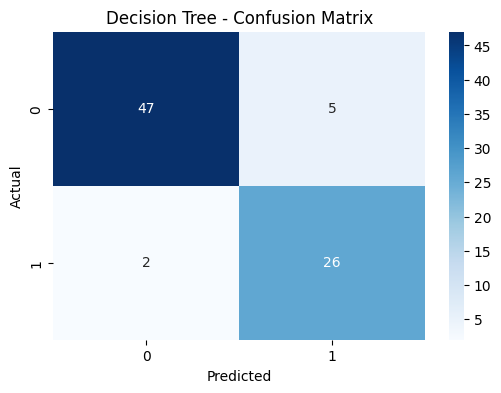

KNN Accuracy: 0.93
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



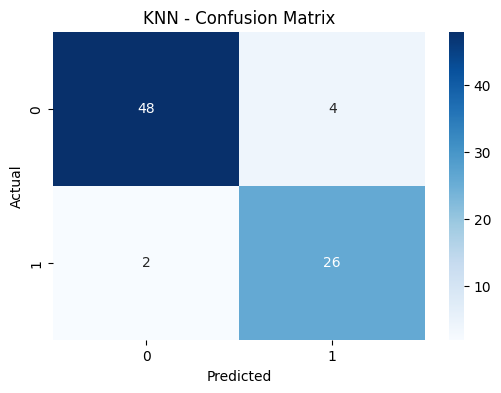

In [ ]:
# Evaluate Models
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("KNN", y_test, y_pred_knn)

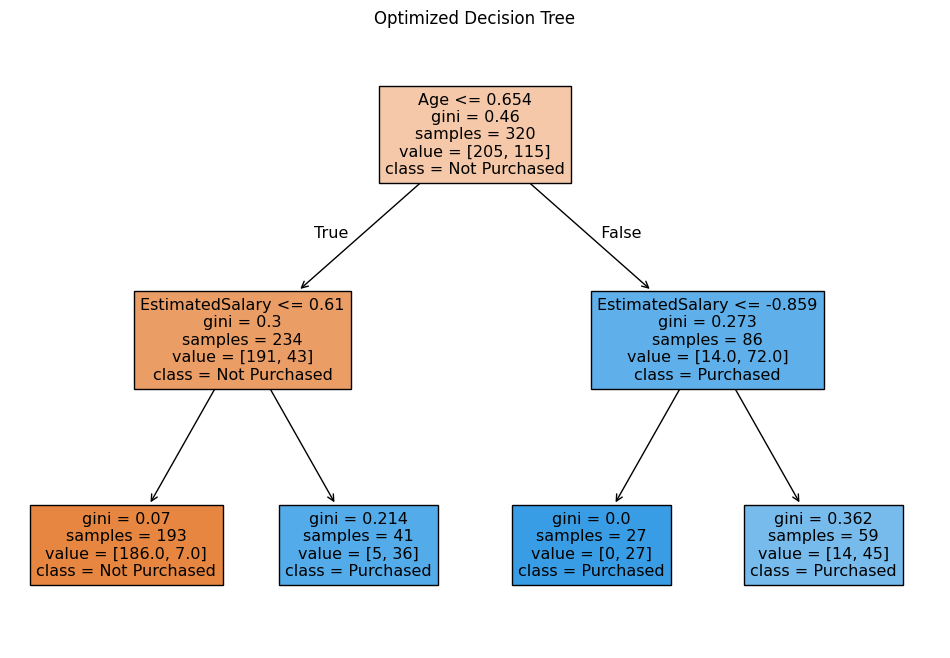

In [ ]:
# Decision Tree Visualization
plt.figure(figsize=(12, 8))
plot_tree(best_dt, feature_names=['Gender', 'Age', 'EstimatedSalary'], class_names=['Not Purchased', 'Purchased'], filled=True)
plt.title("Optimized Decision Tree")
plt.show()


In [ ]:

# Comparison with Other Models
models = {'Decision Tree': best_dt, 'KNN': knn, 'Random Forest': RandomForestClassifier(), 'SVM': SVC()}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Decision Tree Accuracy: 0.91
KNN Accuracy: 0.93
Random Forest Accuracy: 0.90
SVM Accuracy: 0.93


In [ ]:

# Comparison with Other Models
models = {'Decision Tree': best_dt, 'KNN': knn, 'Random Forest': RandomForestClassifier(), 'SVM': SVC()}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [29]:
# Load dataset
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [30]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [32]:
# Drop 'User ID'
df.drop(columns=['User ID'], inplace=True)

In [33]:
# Encode 'Gender'
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # Male=1, Female=0

In [34]:
# Define features & target
X = df.drop(columns=['Purchased'])  # Features
y = df['Purchased']  # Target variable

In [35]:
# Scale numerical features
scaler = StandardScaler()
X[['Age', 'EstimatedSalary']] = scaler.fit_transform(X[['Age', 'EstimatedSalary']])

In [36]:
# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Data preprocessed successfully!")

✅ Data preprocessed successfully!


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [39]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5)  # Default k=5
     }

In [40]:
models

{'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'SVM': SVC(),
 'KNN': KNeighborsClassifier()}

In [41]:
# Train & evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"📊 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

📊 Decision Tree Accuracy: 0.8625
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        52
           1       0.81      0.79      0.80        28

    accuracy                           0.86        80
   macro avg       0.85      0.84      0.85        80
weighted avg       0.86      0.86      0.86        80

--------------------------------------------------
📊 Random Forest Accuracy: 0.9000
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        52
           1       0.83      0.89      0.86        28

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80

--------------------------------------------------
📊 SVM Accuracy: 0.9250
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90   

In [42]:
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

In [43]:
# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


In [44]:

# Anomaly Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(X)

print("✅ Clustering & Anomaly Detection implemented!")

✅ Clustering & Anomaly Detection implemented!


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

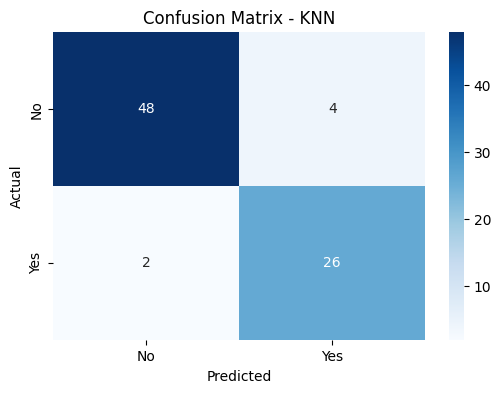

In [47]:
# Confusion Matrix for KNN
y_pred_knn = models["KNN"].predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
# Define hyperparameters
param_grid = {'n_neighbors': [3, 5, 7, 9]}

In [ ]:
# Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)


In [50]:
# Print best parameters
print(f"🔧 Best KNN parameters: {grid_search.best_params_}")

🔧 Best KNN parameters: {'criterion': 'gini', 'max_depth': 2}


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

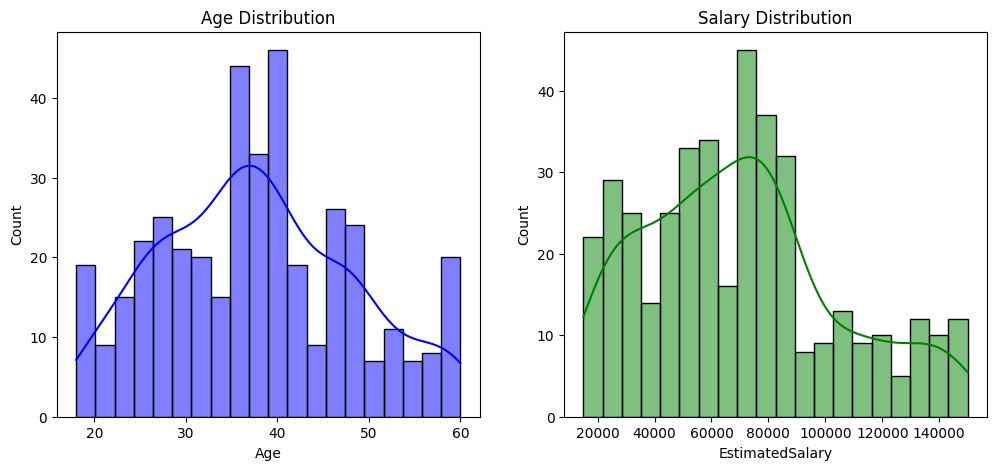

In [53]:
# Feature Distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['EstimatedSalary'], bins=20, kde=True, color='green')
plt.title('Salary Distribution')


plt.show()

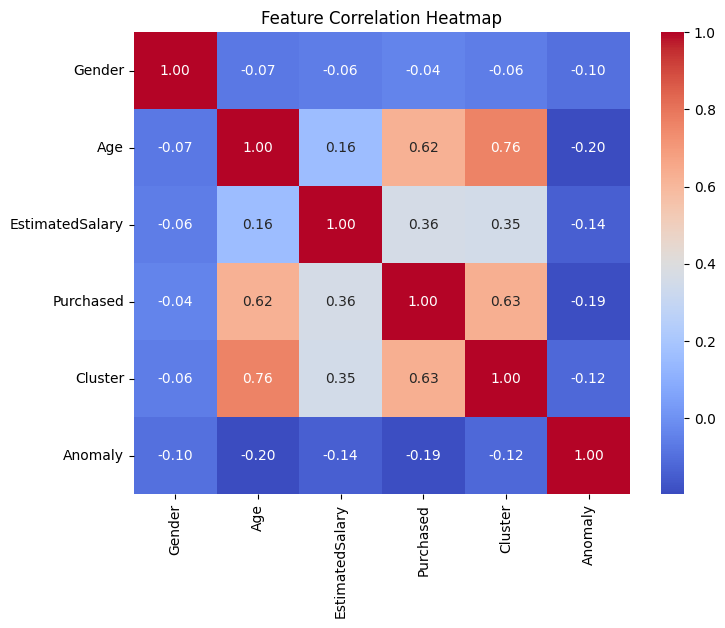

In [54]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [55]:
import numpy as np
from mlxtend.plotting import plot_decision_regions

<ipython-input-59-73255b4406df>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


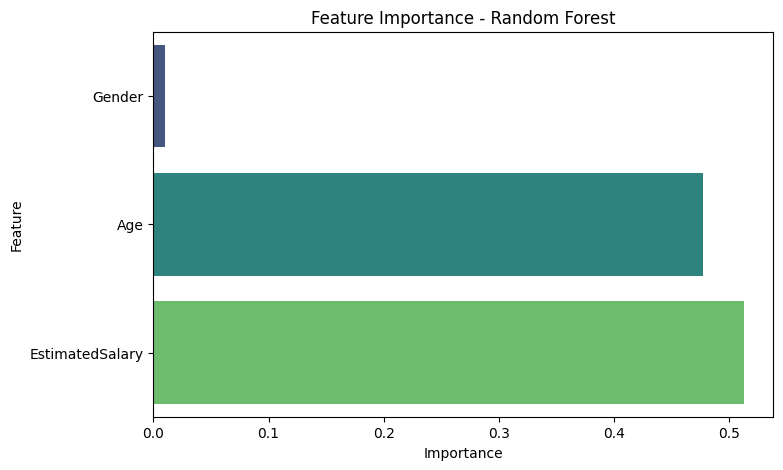

In [59]:
# Get feature importance from Decision Tree
importances = models["Random Forest"].feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


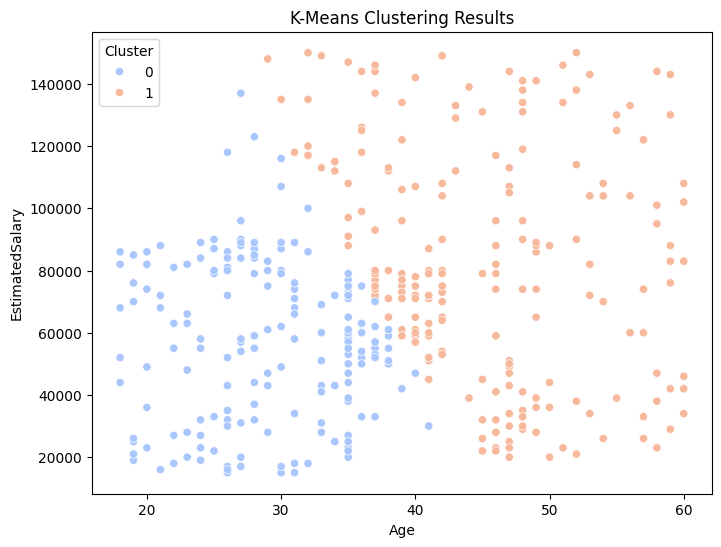

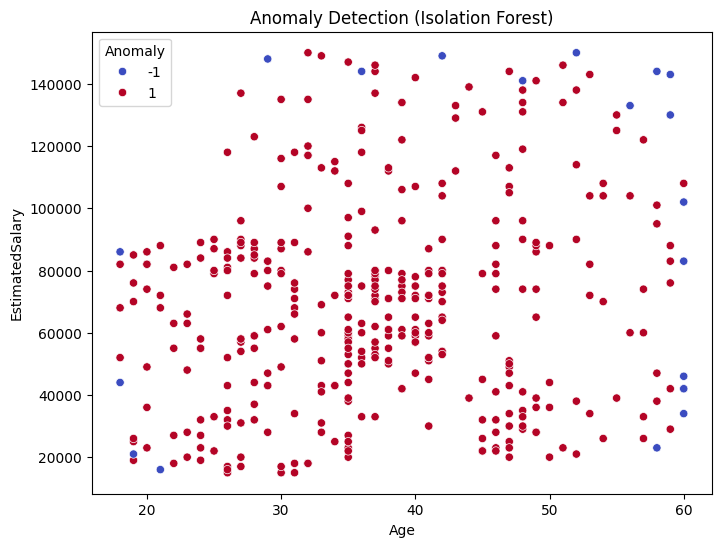

In [60]:
# Scatter plot for K-Means Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['EstimatedSalary'], hue=df['Cluster'], palette="coolwarm")
plt.title("K-Means Clustering Results")
plt.show()

# Anomaly detection plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['EstimatedSalary'], hue=df['Anomaly'], palette="coolwarm")
plt.title("Anomaly Detection (Isolation Forest)")
plt.show()


📊 KNN Accuracy (k=5): 0.9250
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



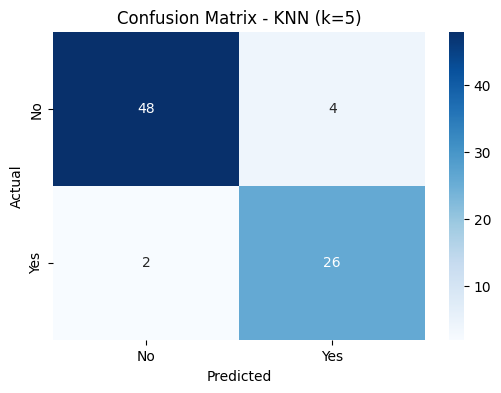

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def train_knn(X_train, X_test, y_train, y_test, n_neighbors=5):
    # Train KNN Model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    # Predictions
    y_pred = knn.predict(X_test)

    # Model Evaluation
    acc = accuracy_score(y_test, y_pred)
    print(f"📊 KNN Accuracy (k={n_neighbors}): {acc:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - KNN (k={n_neighbors})")
    plt.show()

    return knn

# Run KNN Function
knn_model = train_knn(X_train, X_test, y_train, y_test, n_neighbors=5)


🔧 Best KNN parameter: k=7
📊 KNN Accuracy (k=7): 0.9250
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



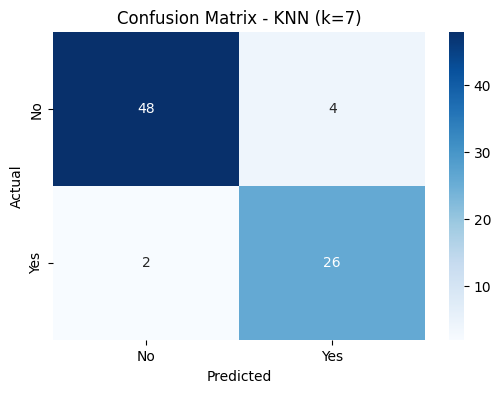

In [62]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'n_neighbors': list(range(1, 21))}

# Grid Search for Best k
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best K Value
best_k = grid_search.best_params_['n_neighbors']
print(f"🔧 Best KNN parameter: k={best_k}")

# Train KNN with best k
knn_best = train_knn(X_train, X_test, y_train, y_test, n_neighbors=best_k)


🔧 Best KNN parameter: k=7
📊 KNN Accuracy (k=7): 0.9250
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



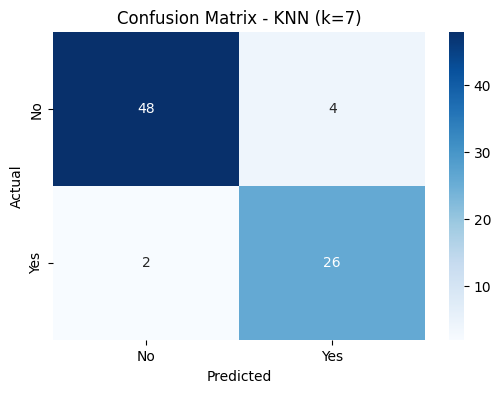

In [63]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'n_neighbors': list(range(1, 21))}

# Grid Search for Best k
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best K Value
best_k = grid_search.best_params_['n_neighbors']
print(f"🔧 Best KNN parameter: k={best_k}")

# Train KNN with best k
knn_best = train_knn(X_train, X_test, y_train, y_test, n_neighbors=best_k)


In [64]:
# config.py
RANDOM_STATE = 42
TEST_SIZE = 0.2
HYPERPARAMETERS = {
    'max_depth': [2, 3, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [65]:
# data_loading.py
from sklearn.datasets import load_iris

def load_data():
    """Load and return Iris dataset"""
    iris = load_iris()
    return iris.data, iris.target, iris.feature_names, iris.target_names

In [66]:
# preprocessing.py
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def preprocess_data(X, y):
    """Preprocess data with scaling and train-test split"""
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return train_test_split(X_scaled, y, test_size=TEST_SIZE, random_state=RANDOM_STATE), scaler

In [67]:
# model_training.py
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def train_model(X_train, y_train):
    """Train model with hyperparameter tuning"""
    model = DecisionTreeClassifier(random_state=RANDOM_STATE)
    grid_search = GridSearchCV(model, HYPERPARAMETERS, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search

In [72]:
# evaluation.py
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, target_names):
    """Evaluate model performance and generate metrics"""
    y_pred = model.predict(X_test)

    # Print metrics
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

    # Generate confusion matrix plot
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True, fmt='d',
                cmap='Blues',
                xticklabels=target_names,
                yticklabels=target_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

In [73]:
evaluate_model

<function __main__.evaluate_model(model, X_test, y_test, target_names)>